In [31]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

In [32]:
df=pd.read_csv('..\preprocessed.csv')
pd.set_option("display.max_columns", None)
df

,Time,TempC,TempF,WindSpeedMiles,WindSpeedKmph,WindDirDegree,WindDir16Point,WeatherDesc,PrecipMM,PrecipInches,Humidity,VisibilityKm,VisibilityMiles,PressureMB,PressureInches,CloudCover,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,Date_Month
0,0,20.0,68.0,3,5.0,37.0,11,0,0.0,0.0,47,10,6,1015,30,0.0,20,68,12,54,20.0,68.0,6,10.0,20,68,1
1,100,19.0,67.0,3,4.0,36.0,11,0,0.0,0.0,48,10,6,1015,30,0.0,19,67,12,54,19.0,67.0,8,13.0,19,67,1
2,200,19.0,66.0,2,4.0,35.0,11,0,0.0,0.0,48,10,6,1015,30,0.0,19,66,12,54,19.0,66.0,8,13.0,19,66,1
3,300,18.5,65.0,2,4.0,34.0,6,0,0.0,0.0,48,10,6,1014,30,0.0,18,66,12,53,18.5,65.0,8,13.0,18,66,1
4,400,18.5,65.0,2,4.0,35.0,11,0,0.0,0.0,49,10,6,1015,30,1.0,18,66,12,53,18.5,65.0,8,12.0,18,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,1900,26.0,79.0,4,7.0,303.0,2,0,0.0,0.0,45,10,6,1011,30,0.0,27,80,13,56,26.0,79.0,8,13.0,27,80,12
8785,2000,25.0,78.0,3,4.0,333.0,0,0,0.0,0.0,46,10,6,1012,30,0.0,26,79,13,55,25.0,78.0,5,9.0,26,79,12
8786,2100,25.0,77.0,2,4.0,19.0,6,0,0.0,0.0,47,10,6,1012,30,1.0,26,78,13,55,25.0,77.0,5,7.0,26,78,12
8787,2200,24.0,76.0,2,4.0,41.0,11,0,0.0,0.0,47,10,6,1012,30,2.0,25,78,12,54,24.0,76.0,5,8.0,25,78,12


In [33]:
X=df.drop(['TempF','FeelsLikeF','WindChillF','HeatIndexF','DewPointF','WindGustMiles','WindSpeedMiles','WeatherDesc'],axis=1)
y=df[['WeatherDesc']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=MultiOutputClassifier(DecisionTreeClassifier())

model.fit(X_train, y_train)


MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [34]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9527872582480091

Mean Feature Importance:
            Feature  Mean Importance
12       CloudCover         0.303559
0              Time         0.241191
1             TempC         0.159916
5          PrecipMM         0.147287
18       Date_Month         0.032679
6      PrecipInches         0.031712
9   VisibilityMiles         0.018279
7          Humidity         0.011452
8      VisibilityKm         0.010814
3     WindDirDegree         0.010480
16     WindGustKmph         0.007649
2     WindSpeedKmph         0.007021
14        DewPointC         0.004230
10       PressureMB         0.004134
4    WindDir16Point         0.003697
17       FeelsLikeC         0.003135
13       HeatIndexC         0.001790
15       WindChillC         0.000975
11   PressureInches         0.000000


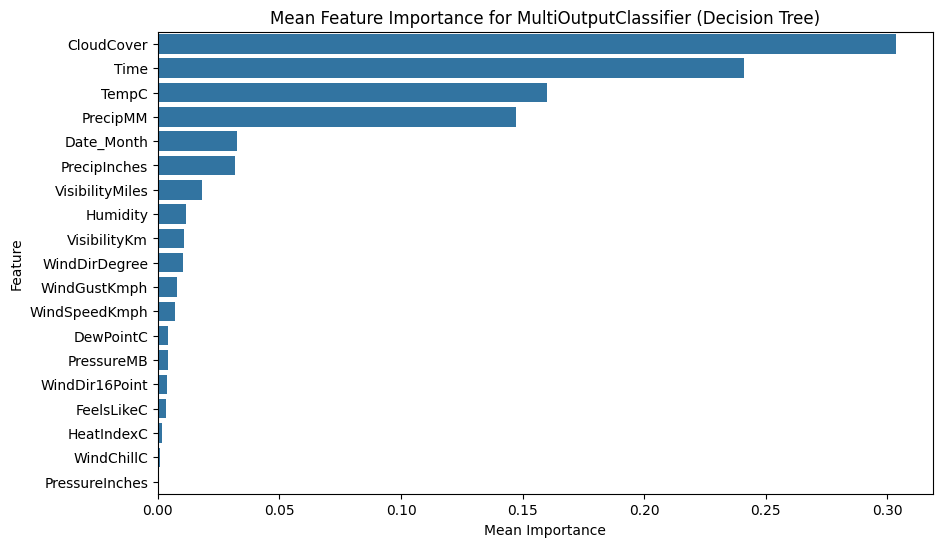

In [35]:
feature_importances_list = []
for estimator in model.estimators_:
    feature_importances_list.append(estimator.feature_importances_)

mean_feature_importances = np.mean(feature_importances_list, axis=0)

importance_df = pd.DataFrame({'Feature': X.columns, 'Mean Importance': mean_feature_importances})

importance_df = importance_df.sort_values(by='Mean Importance', ascending=False)

print("Mean Feature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Importance', y='Feature', data=importance_df)
plt.title('Mean Feature Importance for MultiOutputClassifier (Decision Tree)')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.show()

Permutation Importance:
            Feature  Permutation Importance
12       CloudCover                0.477873
0              Time                0.308020
5          PrecipMM                0.206655
18       Date_Month                0.064391
6      PrecipInches                0.031797
13       HeatIndexC                0.018601
16     WindGustKmph                0.012059
9   VisibilityMiles                0.009727
8      VisibilityKm                0.009101
7          Humidity                0.007224
10       PressureMB                0.006371
3     WindDirDegree                0.005745
14        DewPointC                0.005688
4    WindDir16Point                0.004323
1             TempC                0.002105
2     WindSpeedKmph                0.001934
15       WindChillC                0.001081
17       FeelsLikeC                0.000967
11   PressureInches                0.000000


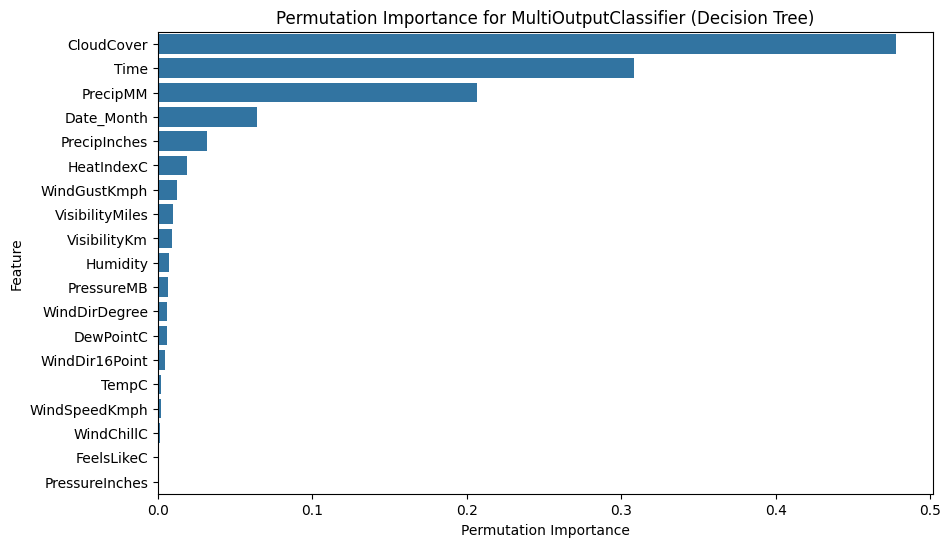

In [36]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

permutation_importances = perm_importance.importances_mean

importance_df = pd.DataFrame({'Feature': X.columns, 'Permutation Importance': permutation_importances})

importance_df = importance_df.sort_values(by='Permutation Importance', ascending=False)

print("Permutation Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Permutation Importance', y='Feature', data=importance_df)
plt.title('Permutation Importance for MultiOutputClassifier (Decision Tree)')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.show()
